In [1]:
import pandas as pd
import numpy as np
#from datetime import datetime, timedelta, date, time
import matplotlib.pyplot as plt
import plotly.express as px
pd.options.plotting.backend = "plotly"
pd.set_option('display.max_columns', 150, 'display.max_rows', 100, 'display.max_colwidth', 15)
%matplotlib inline
# get directory address


In [2]:
GREY1 = "#231F20";GREY2 = "#414040";GREY3 = "#555655";GREY4 = "#646369";GREY5 = "#76787B";GREY6 = "#828282";GREY7 = "#929497";GREY8 = "#A6A6A5";GREY9 = "#BFBEBE";BLUE1 = "#174A7E";
BLUE2 = "#4A81BF";BLUE3 = "#94B2D7";BLUE4 = "#94AFC5";BLUE5 = "#22435e";BLUE6 = "#95B3D7";RED1 = "#C3514E";RED2 = "#E6BAB7";RED3 = "#800000";GREEN1 = "#0C8040";GREEN2 = "#9ABB59"
GREEN3 = "#31859C";GREEN4 = "#4BACC6";GREEN5 = "#93CDDD";ORANGE1 = "#F79747";ORANGE2 = "#FAC090"; BLUE_CPD1= "#137FA7";BLUE_CPD2= "#00385D";BLUE_CPD3= "#EAF6FE";BLUE_CPD4= "#51BCE1"

## 1.1 Load data from csv file
> load data

Check the test set and we notice it has missing values so it needs umputing

In [3]:
#df= pd.read_csv("/Users/waleedidrees/Dropbox/Python Projects/helpful code/classification_models/loan_train.csv")
df= pd.read_csv("Customer-Churn.csv")
df=df.rename(columns= lambda df_: str.lower(df_))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [4]:
df.head().T

,0,1,2,3,4
customerid,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
seniorcitizen,0,0,0,0,0
partner,Yes,No,No,No,No
dependents,No,No,No,No,No
tenure,1,34,2,45,2
phoneservice,No,Yes,Yes,No,Yes
multiplelines,No phone se...,No,No,No phone se...,No
internetservice,DSL,DSL,DSL,DSL,Fiber optic
onlinesecurity,No,Yes,Yes,Yes,No


In [5]:
df =(
df.apply(lambda df_: df_.str.lower() if df_.dtype.name == 'object' else df_)
.assign(
    seniorcitizen= df.seniorcitizen.astype("bool"),
    tenure= df.tenure.astype("int8"),
    totalcharges= pd.to_numeric(df.totalcharges, errors="coerce"),    
)
#.dropna()
.assign(churn= lambda df_: (df_.churn == "yes").astype("int8"))
)
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,False,yes,no,1,no,no phone se...,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic ...,29.85,29.85,0
1,5575-gnvde,male,False,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.50,0
2,3668-qpybk,male,False,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,1
3,7795-cfocw,male,False,no,no,45,no,no phone se...,dsl,yes,no,yes,yes,no,no,one year,no,bank transf...,42.30,1840.75,0
4,9237-hqitu,female,False,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic ...,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,False,yes,yes,24,yes,yes,dsl,yes,no,yes,yes,yes,yes,one year,yes,mailed check,84.80,1990.50,0
7039,2234-xaduh,female,False,yes,yes,72,yes,yes,fiber optic,no,yes,yes,no,yes,yes,one year,yes,credit card...,103.20,7362.90,0
7040,4801-jzazl,female,False,yes,yes,11,no,no phone se...,dsl,yes,no,no,no,no,no,month-to-month,yes,electronic ...,29.60,346.45,0
7041,8361-ltmkd,male,True,yes,no,4,yes,yes,fiber optic,no,no,no,no,no,no,month-to-month,yes,mailed check,74.40,306.60,1


># Drop loan id columns bcz its just a unique identifier

In [6]:
df = df.drop(columns=["customerid"]).rename(columns= {"churn" : "target"})
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,target
0,female,False,yes,no,1,no,no phone se...,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic ...,29.85,29.85,0
1,male,False,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.50,0
2,male,False,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,1
3,male,False,no,no,45,no,no phone se...,dsl,yes,no,yes,yes,no,no,one year,no,bank transf...,42.30,1840.75,0
4,female,False,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic ...,70.70,151.65,1


In [7]:
target_variable= "target"
all_cols = df.drop(columns="target").columns.tolist()                      
cat_cols = df.drop(columns="target").select_dtypes(["object","category"]).columns.tolist()                      
num_cols= df.drop(columns="target").columns[~df.drop(columns="target").columns.isin(cat_cols)] 

### 1.1 Data Types and Descriptive Stats

In [8]:
df.describe(include="all").round(1).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seniorcitizen,7043,2,False,5901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
partner,7043,2,no,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependents,7043,2,no,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.4,24.6,0.0,9.0,29.0,55.0,72.0
phoneservice,7043,2,yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
multiplelines,7043,3,no,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internetservice,7043,3,fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onlinesecurity,7043,3,no,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onlinebackup,7043,3,no,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isna().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
target               0
dtype: int64

### 1.2 Exploratory Data Visualisations (EDA)

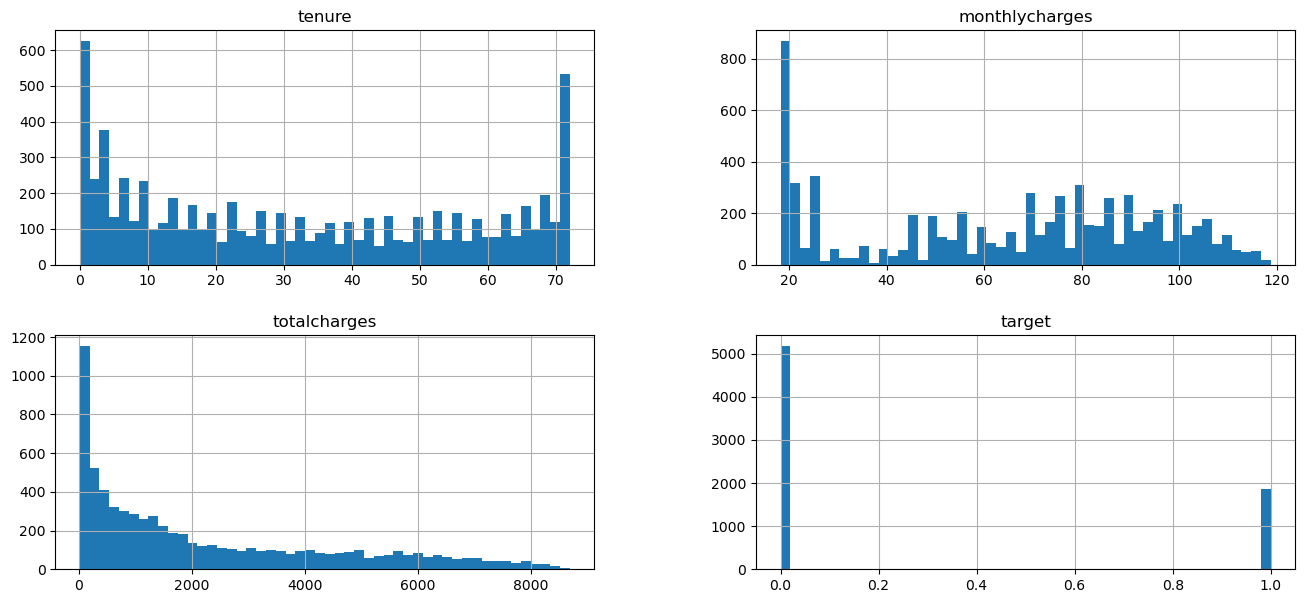

In [10]:
pd.options.plotting.backend = "matplotlib"
df.hist(
    bins=50, 
    figsize=(16,7)   
    )
plt.show()
pd.options.plotting.backend = "plotly"

# Feature importance

In [11]:
df_ratio= df.target.value_counts()
df_ratio

0    5174
1    1869
Name: target, dtype: int64

In [12]:
df_ratio[1], df_ratio[0]

(1869, 5174)

In [13]:
churrn_ratio= df_ratio[1]/ (df_ratio[1]+ df_ratio[0])
churrn_ratio

0.2653698707936959

## The churn ratio is 27% approximately and the graph shows the count of non churns and churns

In [14]:
df.groupby(["target"]).agg(total = pd.NamedAgg("target", "count")).reset_index().plot.bar(color= "target", text_auto= True)

## graph below shows the count of churn and no churns gender, partner and senior citizen

In [15]:
(
    df.melt(id_vars= ["target", "totalcharges"],value_vars= cat_cols)
    .groupby(["target", "variable", "value"])
    .agg(total = pd.NamedAgg( "target","count"))
    .reset_index()
    .plot.bar(x= "target", y= "total", color="value", facet_col="variable",facet_col_wrap= 5 ,   barmode= "group", height= 900, text_auto =True)
    .update_yaxes(matches =None,showticklabels=True)
    .update_xaxes(matches = None)    
)

## From the plot above it seems like the gender feature is the least important as the the churn ratios are pretty much the same for male and female

In [16]:
(
    df.melt(id_vars= ["target", "totalcharges"],value_vars= cat_cols)
    .groupby(["variable", "value"])    
    .agg(total = pd.NamedAgg("target", "mean"))
    .reset_index()    
    .assign(churn_diff =  lambda df_: df_.total - churrn_ratio)
    .assign(risk_ratio =  lambda df_: df_.total /churrn_ratio)
    .assign(high_low_risk =  lambda df_: df_.risk_ratio - 1)
    .sort_values(["risk_ratio"], ascending=False)
)


,variable,value,total,churn_diff,risk_ratio,high_low_risk
28,paymentmethod,electronic ...,0.452854,0.187484,1.706502,0.706502
0,contract,month-to-month,0.427097,0.161727,1.609440,0.609440
11,internetser...,fiber optic,0.418928,0.153558,1.578656,0.578656
19,onlinesecurity,no,0.417667,0.152297,1.573906,0.573906
38,techsupport,no,0.416355,0.150985,1.568960,0.568960
16,onlinebackup,no,0.399288,0.133918,1.504645,0.504645
5,deviceprote...,no,0.391276,0.125906,1.474456,0.474456
32,streamingmo...,no,0.336804,0.071434,1.269188,0.269188
23,paperlessbi...,yes,0.335651,0.070281,1.264842,0.264842
35,streamingtv,no,0.335231,0.069861,1.263261,0.263261


* Positive risk ratio mean higher risk and negative means lower risk
* -negative values magnitude tells us that this category is least likely to leave
* positive values magnitude tells us that this category is most likely to leave
* the risk ratio for female and male is closer to 1 and it means that being male or female is not making much of difference

# Catagorical Feature Importance
* For categorical variables, one such metric is mutual information, which tells how much information we learn about one variable if we learn the value of the other variable. It’s a concept from information theory, and in machine learning, we often use it to measure the mutual dependency between two variables. Higher values of mutual information mean a higher degree of dependence

In [17]:
from sklearn.metrics import mutual_info_score
feat_importance=[]
for x in cat_cols:
    imp= pd.DataFrame(
    {"feats": [x],
    "score": [mutual_info_score(df[x], df.target).round(2)]}
    )
    feat_importance.append(imp)

feat_imp_cat= pd.concat(feat_importance, axis=0).sort_values("score", ascending=False).reset_index(drop=True)
feat_imp_cat

,feats,score
0,contract,0.10
1,internetser...,0.06
2,onlinesecurity,0.06
3,techsupport,0.06
4,onlinebackup,0.05
5,deviceprote...,0.04
6,paymentmethod,0.04
7,streamingtv,0.03
8,streamingmo...,0.03
9,paperlessbi...,0.02


* we can ignore , gender, phoneservice and mutliplelines

In [18]:
feat_imp_cat= feat_imp_cat[feat_imp_cat.score >= 0.01]
cat_cols=feat_imp_cat.feats.values.tolist()
cat_cols

['contract',
 'internetservice',
 'onlinesecurity',
 'techsupport',
 'onlinebackup',
 'deviceprotection',
 'paymentmethod',
 'streamingtv',
 'streamingmovies',
 'paperlessbilling',
 'partner',
 'dependents']

In [19]:
df.corr(numeric_only=True)[["target"]]

,target
seniorcitizen,0.150889
tenure,-0.352229
monthlycharges,0.193356
totalcharges,-0.199484
target,1.000000


In [20]:
df=df.drop(columns= ["partner","dependents","gender","phoneservice", "multiplelines"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seniorcitizen     7043 non-null   bool   
 1   tenure            7043 non-null   int8   
 2   internetservice   7043 non-null   object 
 3   onlinesecurity    7043 non-null   object 
 4   onlinebackup      7043 non-null   object 
 5   deviceprotection  7043 non-null   object 
 6   techsupport       7043 non-null   object 
 7   streamingtv       7043 non-null   object 
 8   streamingmovies   7043 non-null   object 
 9   contract          7043 non-null   object 
 10  paperlessbilling  7043 non-null   object 
 11  paymentmethod     7043 non-null   object 
 12  monthlycharges    7043 non-null   float64
 13  totalcharges      7032 non-null   float64
 14  target            7043 non-null   int8   
dtypes: bool(1), float64(2), int8(2), object(10)
memory usage: 681.0+ KB


In [21]:
df[df.select_dtypes(["bool","object", "category"]).columns] = df.select_dtypes(["bool","object", "category"]).apply(lambda df_: pd.factorize(df_)[0])
df

,seniorcitizen,tenure,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,target
0,0,1,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,0,34,0,1,1,1,0,0,0,1,1,1,56.95,1889.50,0
2,0,2,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1
3,0,45,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0
4,0,2,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,0,1,1,1,1,1,1,1,0,1,84.80,1990.50,0
7039,0,72,1,0,0,1,0,1,1,1,0,3,103.20,7362.90,0
7040,0,11,0,1,1,0,0,0,0,0,0,0,29.60,346.45,0
7041,1,4,1,0,1,0,0,0,0,0,0,1,74.40,306.60,1


* all the numeric features have strong correlation and are important features for analysis

# Look for correlation between all variables and target variable

In [22]:
# import hvplot.pandas
# import holoviews as hv
# hv.extension("bokeh")
# df_cor= df.corr(numeric_only= True).round(3)
# p = df_cor.hvplot.heatmap(x="columns", y= "index", rot =45, cmap= "Oranges" , width = 1000, height=400)
# p * hv.Labels(p).opts(text_font_size = "8pt")

## Remove Feats which have high correlation between themselves to avoid autocorrelation

WE will keep all numeric features

### Pair plot

In [23]:
# import seaborn as sns
# sns.pairplot(df, hue='target', height=3)

>#  Custom Mix Immputer class

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted # This function just makes sure that the object is fitted
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

class mix_imputer(BaseEstimator, TransformerMixin):
     def __init__(self, impute_missing =True):                                
        self.impute_missing = impute_missing        
                
     def fit(self, X, y = None):         
         return self
 
     def transform(self, X):
        from sklearn.neighbors import KNeighborsRegressor
        from sklearn.preprocessing import LabelEncoder
        encoder= LabelEncoder()

        X = X.copy()
        cols = X.select_dtypes(["object","category"]).columns.tolist()       
        
        if self.impute_missing:                        
            # we use LabelEncoder bcz it keeps the Nan values of catergories and converts labels (i.e male, female, gay) to 0., 1., 2. floats            
            mapped_dic = {}

            for abc in cols:                
                X[[abc]]=( 
                    X[[abc]].apply(lambda series: pd.Series(
                    encoder.fit_transform(series[series.notnull()]),
                    index=series[series.notnull()].index
                    ))
                    )
                encode_dic= { x: y for x,y in zip ( X[abc][ X[abc].notnull()].unique(), encoder.classes_)}   
                mapped_dic[abc]= encode_dic                 
                        
            # after encoding data apply knn imputer on all the data and fill missing values.            
            imp_knn = IterativeImputer(estimator= KNeighborsRegressor(n_jobs=-1, n_neighbors= X.shape[1]), 
                            #initial_strategy='most_frequent',
                            max_iter=100, random_state=0)
            
            # imputed values are returned in arrays so convert it back to dataframe
            X = pd.DataFrame(imp_knn.fit_transform(X), columns= X.columns.tolist())               
            
            # round of all categorical columns so that if imputed value is 0.6 it will be converted to 1. instead
            X[cols] = X[cols].round(0).astype("int")
            # now convert all the computed values from 1. , 2. encoding to original labels.    
            
            for abc in cols:
                X[abc] = X[abc].map(mapped_dic[abc])            
            
            # After this step we can again convert the categorical columns to dummies using onehot encoding
        else:
            X = X.copy()
        return X


># Impute missing Values

In [25]:
df_final=  mix_imputer(impute_missing=True).fit_transform(df)
df_final=df_final .reset_index(drop=True)

In [26]:
df_final.isna().sum()

seniorcitizen       0
tenure              0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
target              0
dtype: int64

In [27]:
target_variable= "target"
df_x = df_final.drop(columns=target_variable)
df_y = df_final[target_variable]


In [28]:
df_final.target.loc[1:20]

1     0.0
2     1.0
3     0.0
4     1.0
5     1.0
6     0.0
7     0.0
8     1.0
9     0.0
10    0.0
11    0.0
12    0.0
13    1.0
14    0.0
15    0.0
16    0.0
17    0.0
18    1.0
19    0.0
20    1.0
Name: target, dtype: float64

In [29]:
df_final[target_variable].value_counts()

0.0    5174
1.0    1869
Name: target, dtype: int64

# Train/Test Split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size = 0.3, stratify=df_y, random_state =42
    )
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4930, 14), (4930,), (2113, 14), (2113,))

# Random Oversampling
Random Oversampling is simply randomly picking data points in our minority class and duplicating them. 

# Random Undersampling
Random Undersampling is simply randomly picking data points in our majority class and removing them. 

# Synthetic Minority Oversampling (SMOTE)
Synthetic Minority Oversampling (SMOTE) is an oversampling technique that creates synthetic data points. SMOTE address’ the core problem in oversampling. Oversampling creates duplicate datapoints whereas SMOTE slightly alters these data points. 

# Borderline Smote
The idea behind borderline SMOTE is that we only want to use data that’s at risk of being misclassified as the data to be oversampled. In this case, we build a classifier to classify points as positive or negative. Then, for the data points we misclassify, we oversample those data points. This would hopefully train our algorithm to better recognize these difficult instances and correct for them. 

# Adaptive Synthetic Oversampling (ADASYN)
The idea behind AdaSyn is to use a weight distribution of our minority class. Essentially, we give higher weight to instances that are more difficult to learn and lower weight to instances that are easier to learn. AdaSyn is very similar to safe-level SMOTE, except there’s just a different way of computing the synthetic data points. 

In [31]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN 
#up_smpl = RandomOverSampler(random_state = 42) 
#up_smpl = RandomUnderSampler(random_state = 42) 
up_smpl = SMOTE(random_state = 42) 
#up_smpl = BorderlineSMOTE(random_state = 42) 
#up_smpl = ADASYN(random_state = 42) 

#X_train,y_train = up_smpl.fit_resample(X_train,y_train)


# Preprocess Data

In [32]:
# preprocess imports
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline # use this pipe line to use smote upsampling as sklearn pipeline doesnt work with smote
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

># Preprocessor

In [33]:
from sklearn.preprocessing import FunctionTransformer
sqrt_transformer = FunctionTransformer(np.sqrt, inverse_func=np.square, feature_names_out= "one-to-one")

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin
class MeanEncoding(BaseEstimator, TransformerMixin):    
    def __init__(self):        
        self.encoding = pd.DataFrame

    def fit(self, X, y):
        y=y.to_frame()
        # Calculate the mean target value for each category
        self.group_col= X.columns.tolist()[0]
        self.encoding = y[["target"]].groupby(X[self.group_col]).agg(target_mean= ("target", 'mean'))        
        return self
            
    def transform(self, X):
        # Replace the categorical column with the mean encoding   
        X[self.group_col+ "_encoded" ]= X[self.group_col].map(self.encoding["target_mean"])
        return X.drop(self.group_col, axis=1)

    def get_feature_names_out(self, names=None):       
        return [self.group_col+ "_encoded" ]

MeanEncoding().fit_transform(df[["deviceprotection"]], df["target"])

/var/folders/3d/z1qzqy6s4p5_06dtsnr__3qh0000gn/T/ipykernel_87393/4170524219.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,deviceprotection_encoded
0,0.391276
1,0.225021
2,0.391276
3,0.225021
4,0.391276
...,...
7038,0.225021
7039,0.225021
7040,0.391276
7041,0.391276


In [35]:
# seperate columns
all_cols = X_train.columns.tolist()                      
cat_cols = X_train.select_dtypes(["object","category"]).columns.tolist()                      
num_cols= X_train.columns[~X_train.columns.isin(cat_cols)] 

mean_encoder_pipe= Pipeline (
        steps =[                         
        ('encoder', MeanEncoding()),
        ("std_scaler", preprocessing.StandardScaler()),                       
                ])

num_pipe= Pipeline (
        steps =[
        ("std_scaler", preprocessing.StandardScaler()),        
        ("variance_filter", VarianceThreshold(threshold= 0.1)),        
                ]
                    )
cat_pipe= Pipeline (
        steps =[        
        ("one_hot", OneHotEncoder (sparse_output=False, drop= "first", handle_unknown= "ignore")),
        ("variance_filter", VarianceThreshold(threshold= 0.1)),
                ]
                    )

prep = ColumnTransformer(
    transformers= [      
        ("num", num_pipe, num_cols), 
        ("cat", cat_pipe, cat_cols),              
        # ("a", mean_encoder_pipe, ["partner"] ),
        # ("b", mean_encoder_pipe, ["gender"] ),  
        # ("c", mean_encoder_pipe, ["seniorcitizen"] )  
        ],
        remainder="passthrough",        
n_jobs=-1,
).set_output(transform="pandas")

prep.fit_transform(X_train,y_train)


,num__seniorcitizen,num__tenure,num__internetservice,num__onlinesecurity,num__onlinebackup,num__deviceprotection,num__techsupport,num__streamingtv,num__streamingmovies,num__contract,num__paperlessbilling,num__paymentmethod,num__monthlycharges,num__totalcharges
5557,-0.438147,-1.114728,0.169878,-0.906627,0.178649,-1.007401,-0.915605,0.227907,-1.085390,-0.830916,1.205295,-1.146603,0.504286,-0.836568
2270,2.282338,-1.195884,0.169878,-0.906627,0.178649,0.279921,-0.915605,0.227907,-1.085390,-0.830916,-0.829672,-1.146603,0.724189,-0.907808
6930,-0.438147,-1.195884,0.169878,-0.906627,0.178649,-1.007401,-0.915605,-1.089307,-1.085390,-0.830916,-0.829672,1.463967,0.337292,-0.909640
2257,-0.438147,1.117066,-1.187492,-0.906627,0.178649,0.279921,0.342809,0.227907,0.230315,0.367567,1.205295,1.463967,0.515860,1.110336
898,-0.438147,-0.830682,0.169878,0.349251,0.178649,-1.007401,0.342809,0.227907,0.230315,-0.830916,-0.829672,0.593777,1.122660,-0.515182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4250,-0.438147,1.238800,0.169878,0.349251,-1.172176,0.279921,0.342809,0.227907,-1.085390,0.367567,1.205295,1.463967,1.307841,1.871050
1488,-0.438147,-1.277041,-1.187492,0.349251,0.178649,-1.007401,-0.915605,-1.089307,-1.085390,-0.830916,1.205295,-0.276413,-0.453036,-0.981840
6303,-0.438147,1.563425,0.169878,-0.906627,-1.172176,0.279921,0.342809,0.227907,0.230315,1.566051,1.205295,-1.146603,1.464915,2.358299
2710,-0.438147,-0.343745,1.527247,1.605129,1.529474,1.567243,1.601223,1.545121,1.546021,0.367567,1.205295,1.463967,-1.473187,-0.793576


In [36]:
X_train

,seniorcitizen,tenure,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
5557,0.0,5.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,80.20,384.25
2270,1.0,3.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,86.85,220.95
6930,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,75.15,216.75
2257,0.0,60.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,80.55,4847.05
898,0.0,12.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,98.90,1120.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4250,0.0,63.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,3.0,104.50,6590.80
1488,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,51.25,51.25
6303,0.0,71.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,109.25,7707.70
2710,0.0,24.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,20.40,482.80


# Make Models

In [37]:
# model imports
from sklearn import linear_model 
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
import lightgbm
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# metric evaluation and cross validation
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

># Variable importance

In [38]:
pipe = make_pipeline(prep, tree.DecisionTreeClassifier( class_weight= "balanced" ))
pipe.fit(X_train, y_train)

feat_importances = pd.Series(pipe[1].feature_importances_  , index= prep.fit_transform(X_train).columns.tolist() )
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

># List of models

In [39]:
from sklearn.utils.class_weight import compute_class_weight
sample_weight = compute_class_weight(
             class_weight='balanced', classes=  np.unique(y_train) ,y= y_train
             ) 
MLA= {    
    "lm": linear_model.LogisticRegression(class_weight= "balanced",n_jobs= -1 ),
    #"cgb" : CatBoostClassifier(learning_rate=.1),    
    "dt" : tree.DecisionTreeClassifier(class_weight= "balanced"),
    "rf": ensemble.RandomForestClassifier(class_weight= "balanced",n_jobs= -1 ),
    "lgb": lightgbm.LGBMClassifier(n_jobs=-1),
    #"svc" : svm.SVC(class_weight= "balanced",probability=False)    
    }  

# Create complete preprocess + modelccp_pipes

In [40]:
pipes = {}
for x in MLA.keys():    
        pipe= Pipeline(steps=[(
                "preprocess", prep),
                ('sampling', up_smpl),                
                ('poly', PolynomialFeatures(degree= 1,  interaction_only= True,  include_bias=False)),
                #('feature_selection', SelectFromModel(linear_model.LogisticRegression(class_weight= "balanced", penalty= "l1", C = .04,solver='liblinear' ))),  
                ("model", MLA[x])]
                ).set_output(transform="pandas")
        pipes[x]=  pipe
pipes.keys()

dict_keys(['lm', 'dt', 'rf', 'lgb'])

In [41]:
pipe= Pipeline(steps=[(
                "preprocess", prep),
                ('sampling', up_smpl),                
                ('poly', PolynomialFeatures(degree= 1,  interaction_only= True,  include_bias= False )),
                #('feature_selection', SelectFromModel(linear_model.LogisticRegression(class_weight= "balanced", penalty= "l1", C = .04, solver='liblinear' ))),   
                ('model', lightgbm.LGBMClassifier(n_jobs=-1, random_state=42))            
            ]).set_output(transform="pandas")    

pipe[0:3].fit_transform(df_x, df_y)
pipe.fit(X_train,y_train)
#print(eval_scores(y_test, pipe.predict(X_test)))
pipe[0:3].fit_transform(df_x, df_y)

,num__seniorcitizen,num__tenure,num__internetservice,num__onlinesecurity,num__onlinebackup,num__deviceprotection,num__techsupport,num__streamingtv,num__streamingmovies,num__contract,num__paperlessbilling,num__paymentmethod,num__monthlycharges,num__totalcharges
0,-0.439916,-1.277445,-1.183234,-0.903589,-1.180777,-0.998016,-0.909172,-1.071457,-1.078210,-0.828207,-0.829798,-1.145198,-1.160323,-0.992684
1,-0.439916,0.066327,-1.183234,0.351386,0.173655,0.286059,-0.909172,-1.071457,-1.078210,0.371271,1.205113,-0.274744,-0.259629,-0.172208
2,-0.439916,-1.236724,-1.183234,0.351386,-1.180777,-0.998016,-0.909172,-1.071457,-1.078210,-0.828207,-0.829798,-0.274744,-0.362660,-0.958138
3,-0.439916,0.514251,-1.183234,0.351386,0.173655,0.286059,0.347362,-1.071457,-1.078210,0.371271,1.205113,0.595711,-0.746535,-0.193717
4,-0.439916,-1.236724,0.172250,-0.903589,0.173655,-0.998016,-0.909172,-1.071457,-1.078210,-0.828207,-0.829798,-1.145198,0.197365,-0.938946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,-0.439916,-1.165979,0.172250,-0.903589,0.173655,-0.998016,-0.909172,-1.071457,0.234693,-0.828207,-0.829798,-1.145198,0.488249,-0.873671
10344,-0.439916,-1.258492,-1.183234,-0.903589,0.173655,0.286059,-0.909172,-0.766513,-1.078210,-0.828207,-0.829798,-0.274744,-0.575731,-0.975621
10345,-0.439916,-1.102618,-1.183234,-0.903589,0.173655,-0.998016,-0.909172,-1.071457,-1.078210,-0.828207,1.205113,-1.145198,-0.590216,-0.901146
10346,0.960869,-1.012098,1.527734,1.606361,1.528087,1.570134,1.603896,1.549232,1.547597,-0.828207,1.205113,-1.145198,-1.505760,-0.944462


># Create function for valuation scores

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
def cl_scores(true, predicted):  
    results= pd.DataFrame.from_dict(classification_report(y_test, predicted, output_dict=True))    
    return results

In [43]:
def eval_scores(actuals, pred):
    res= pd.DataFrame({ 
    "accurancy": [accuracy_score(actuals, pred)], 
    "recall": [recall_score(actuals, pred)],
    "roc_auc": [roc_auc_score(actuals, pred)],
    "precision": [precision_score(actuals, pred)]})
    return res

># Test pipeline

>## Run all models once

In [44]:
from sklearn.metrics import roc_auc_score
cl_report= []
scores= []
auc_scores =[]
for model in MLA.keys():    
    pipes[model].fit(X_train, y_train )     
    cl_report.append(cl_scores(y_test, pipes[model].predict(X_test)).assign(model = model))            
    scores.append( eval_scores(y_test, pipes[model].predict(X_test) ).assign(model = model))   

pd.concat(scores)

,accurancy,recall,roc_auc,precision,model
0,0.739707,0.803922,0.760208,0.506173,lm
0,0.714624,0.525847,0.654354,0.466772,dt
0,0.769522,0.584670,0.710505,0.563574,rf
0,0.778987,0.650624,0.738005,0.573899,lgb


In [45]:
#pd.concat(cl_report)

> # Cross Validaiton

,fit_time,score_time,test_score,train_score,model
mean,0.116184,0.014204,0.786207,0.869506,lgb
mean,0.525204,0.043646,0.780325,0.996619,rf
mean,0.033949,0.007308,0.748073,0.749493,lm
mean,0.043337,0.009801,0.734280,0.996777,dt


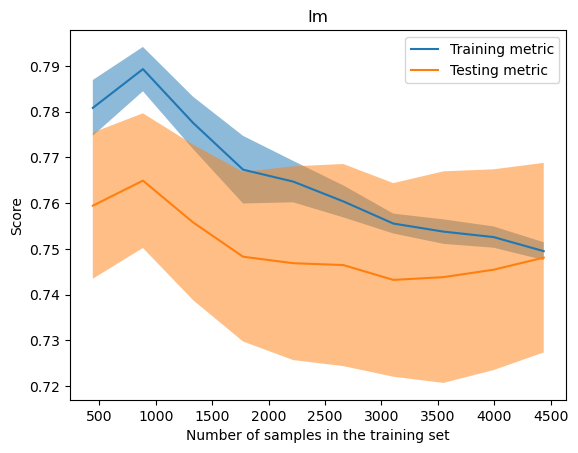

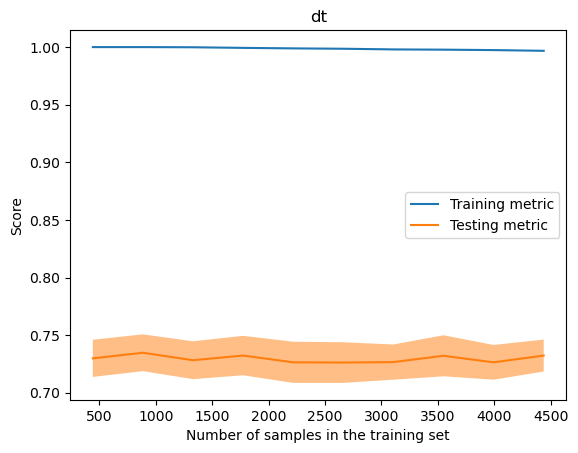

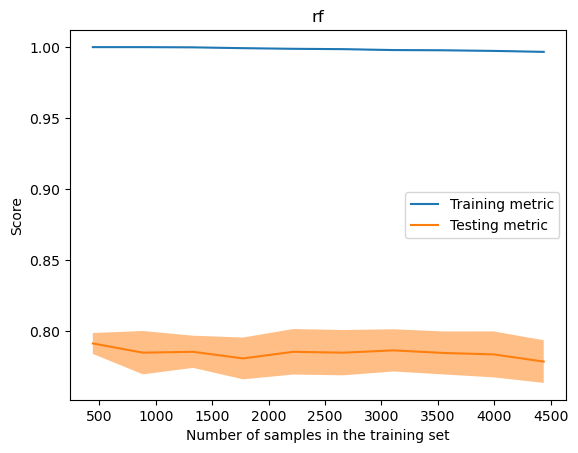

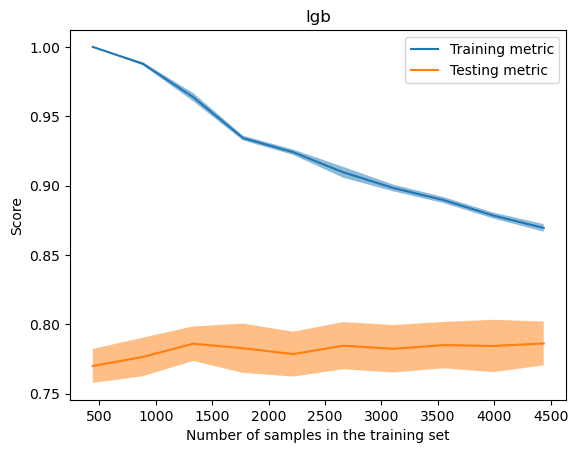

In [46]:
pd.options.plotting.backend = "matplotlib"
from sklearn.model_selection import LearningCurveDisplay

cv_scores= []
scores= []

for x in MLA.keys():    
    cv_model_score = cross_validate(
        pipes[x] ,X_train, y_train,cv=10,return_train_score=True, n_jobs=-1, verbose= 0)
    cv_model_score_mean= (
        pd.DataFrame.from_dict(cv_model_score).agg(["mean"]).assign(model=x))
    cv_scores.append(cv_model_score_mean)    
    
    fig=LearningCurveDisplay.from_estimator(
    pipes[x], X_train, y_train, cv=10, n_jobs=-1, score_type= "both", train_sizes= np.linspace(0.1, 1, 10 ), verbose= 0 
    )   
    plt.title(x)

pd.concat(cv_scores).sort_values("test_score", ascending =False)

# Hyper Parameters

In [47]:
from scipy.stats import randint, uniform, norm,reciprocal, expon, loguniform
reciprocal.rvs(20, 200000), expon.rvs(scale=1.0)
# loc is lower bound value and scale is the +- 2 range and size is number of observations 
uniform.rvs(loc=5, scale=2, size= 10),randint.rvs(low=20, high=70, size=10),norm.rvs(0.1, 1)
# use randint.rvs(1,4) and uniform.rvs to see output values
grid_solvers= ['saga']
grid_poly = randint(1,2)
grid_C=  uniform(0.01, .09)
grid_penalties= ['l2']

grid_kernel = ["linear", "rbf"]

grid_n_estimator = randint(500, 1000)# Number of trees in the forest.
max_features = ['sqrt']
grid_max_depth = randint(2,12) #The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node.
grid_learn=  uniform(0.01, .03)
grid_min_sample_leaves = randint(1, 100)
grid_num_leaves = randint(8, 3000)
fraction= uniform(0.5, .5)

In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

># CV split

In [49]:
cv_split = StratifiedKFold(n_splits= 10, random_state=10 , shuffle=True)

In [50]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(estimators = [
    ('lm',linear_model.LogisticRegression(class_weight= "balanced",n_jobs= -1 )),
    ("dt" , tree.DecisionTreeClassifier(class_weight= "balanced",max_depth = 4,min_samples_leaf = 1)),
    ('rf',ensemble.RandomForestClassifier(class_weight= "balanced",max_depth = 4,n_jobs= -1 )),
    ('lgb',lightgbm.LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)),
#    ('cgb',CatBoostClassifier()),
                                            ],
                           final_estimator = ensemble.RandomForestClassifier())
stack.fit(X_train,y_train);eval_scores(y_test, stack.predict(X_test)).T

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

,0
accurancy,0.792239
recall,0.475936
roc_auc,0.691254
precision,0.648058


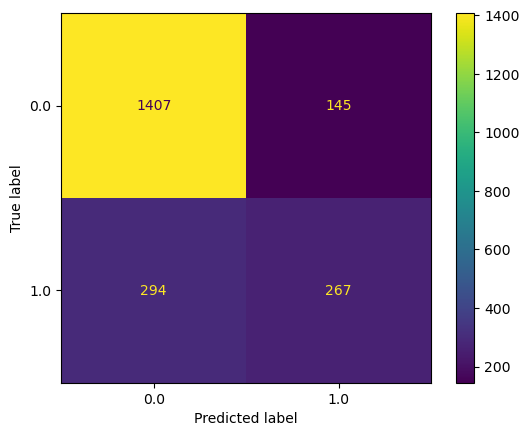

0.0    1552
1.0     561
Name: target, dtype: int64

In [51]:
stack_model= stack
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,stack_model.predict(X_test), labels=stack_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels= stack_model.classes_)
disp.plot()
plt.show()
pd.Series(y_test).value_counts()

In [52]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(estimators = [
    ('lm',linear_model.LogisticRegression(class_weight= "balanced",n_jobs= -1 )),
    ("dt" , tree.DecisionTreeClassifier(class_weight= "balanced",max_depth = 4,min_samples_leaf = 1)),
    ('rf',ensemble.RandomForestClassifier(class_weight= "balanced",max_depth = 4,n_jobs= -1 )),
    ('lgb',lightgbm.LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)),
#    ('cgb',CatBoostClassifier()),
                                            ],
                           final_estimator = ensemble.RandomForestClassifier())

In [53]:
pipe= Pipeline(steps=[(
                "preprocess", prep),
                ('sampling', up_smpl),                
                ('poly', PolynomialFeatures(degree= 1,  interaction_only= True,  include_bias= False )),
                #('feature_selection', SelectFromModel(linear_model.LogisticRegression(class_weight= "balanced", penalty= "l1", C = .04, solver='liblinear' ))),   
                ('model', stack)            
            ])


pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler()),
                                                                  ('variance_filter',
                                                                   VarianceThreshold(threshold=0.1))]),
                                                  Index(['seniorcitizen', 'tenure', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovie...
                 StackingClassifier(estimators=[('lm',
                                                 LogisticRegression(class_weight='balanced',
                                                                    n_jobs=-1)),
                                                ('dt',
                                                 DecisionTreeClassifier(class_weight='balanced',
                                                                        max_depth=4)),
                                                ('rf',
                                                 RandomForestClassifier(class_weight='balanced',
                                                                        max_depth=4,
                                                                        n_jobs=-1)),
                                                ('lgb',
                                                 LGBMClassifier(learning_rate=0.01,
                                                                max_depth=3,
                                                                n_estimators=1000))],
                                    final_estimator=RandomForestClassifier()))])

In [54]:
eval_scores(y_test, pipe.predict(X_test)).T

,0
accurancy,0.771415
recall,0.543672
roc_auc,0.698705
precision,0.573308


In [55]:
MLA_params =  [{
         "poly__degree": grid_poly,        
         #"feature_selection__estimator__C": grid_C,
         'model__lm__penalty' : grid_penalties,         
         'model__lm__solver' :grid_solvers,         
         'model__lm__max_iter': [10000],   
         'model__dt__max_depth': grid_max_depth, 
         'model__dt__max_features': max_features,   
         'model__dt__min_samples_leaf': grid_min_sample_leaves,                           
         'model__rf__n_estimators': grid_n_estimator,  
         'model__rf__max_depth': grid_max_depth,         
         'model__rf__max_features': max_features,
         'model__rf__min_samples_leaf': grid_min_sample_leaves,                                                       
         'model__lgb__learning_rate': grid_C,
         'model__lgb__num_leaves': grid_num_leaves ,
         'model__lgb__min_data_in_leaf': grid_min_sample_leaves,       
         'model__lgb__max_depth': grid_max_depth,       
         'model__lgb__n_estimators': grid_n_estimator,                  
         'model__lgb__feature_fraction': [.5],
         #'model__lgb__scale_pos_weight': [sample_weight[1]/sample_weight[0]],  
        #  'model__cgb__learning_rate': grid_C,       
        #  'model__cgb__depth': grid_max_depth,
        #  'model__cbg__iterations': [100],        
        #  'model__cgb__scale_pos_weight': [sample_weight[1]/sample_weight[0]],                         
         'model__final_estimator__n_estimators': grid_n_estimator,  
         'model__final_estimator__max_depth': grid_max_depth,         
         'model__final_estimator__max_features': max_features,
         'model__final_estimator__min_samples_leaf': grid_min_sample_leaves,                                                       
        }]

In [56]:
grid_cv= RandomizedSearchCV(
    pipe,
    param_distributions = MLA_params,
    cv= cv_split,
    #scoring='accuracy',
    scoring='roc_auc',
    n_iter = 20,
    #refit = "recall",
    verbose= 0,
    n_jobs= -1 )
tune_grid =grid_cv.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min

KeyboardInterrupt: 

In [ ]:
tune_grid.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler()),
                                                                  ('variance_filter',
                                                                   VarianceThreshold(threshold=0.1))]),
                                                  Index(['seniorcitizen', 'tenure', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovie...
                                                 RandomForestClassifier(class_weight='balanced',
                                                                        max_depth=5,
                                                                        min_samples_leaf=46,
                                                                        n_estimators=686,
                                                                        n_jobs=-1)),
                                                ('lgb',
                                                 LGBMClassifier(feature_fraction=0.5,
                                                                learning_rate=0.014417577747644007,
                                                                max_depth=5,
                                                                min_data_in_leaf=88,
                                                                n_estimators=726,
                                                                num_leaves=2884,
                                                                scale_pos_weight=2.7691131498470947))],
                                    final_estimator=RandomForestClassifier(max_depth=3,
                                                                           min_samples_leaf=22,
                                                                           n_estimators=672)))])

In [ ]:
stack_model = tune_grid.best_estimator_
stack_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler()),
                                                                  ('variance_filter',
                                                                   VarianceThreshold(threshold=0.1))]),
                                                  Index(['seniorcitizen', 'tenure', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovie...
                                                 RandomForestClassifier(class_weight='balanced',
                                                                        max_depth=5,
                                                                        min_samples_leaf=46,
                                                                        n_estimators=686,
                                                                        n_jobs=-1)),
                                                ('lgb',
                                                 LGBMClassifier(feature_fraction=0.5,
                                                                learning_rate=0.014417577747644007,
                                                                max_depth=5,
                                                                min_data_in_leaf=88,
                                                                n_estimators=726,
                                                                num_leaves=2884,
                                                                scale_pos_weight=2.7691131498470947))],
                                    final_estimator=RandomForestClassifier(max_depth=3,
                                                                           min_samples_leaf=22,
                                                                           n_estimators=672)))])

In [ ]:
stack_model.fit(X_train, y_train)


[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warn

Pipeline(steps=[('preprocess',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler()),
                                                                  ('variance_filter',
                                                                   VarianceThreshold(threshold=0.1))]),
                                                  Index(['seniorcitizen', 'tenure', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovie...
                                                 RandomForestClassifier(class_weight='balanced',
                                                                        max_depth=5,
                                                                        min_samples_leaf=46,
                                                                        n_estimators=686,
                                                                        n_jobs=-1)),
                                                ('lgb',
                                                 LGBMClassifier(feature_fraction=0.5,
                                                                learning_rate=0.014417577747644007,
                                                                max_depth=5,
                                                                min_data_in_leaf=88,
                                                                n_estimators=726,
                                                                num_leaves=2884,
                                                                scale_pos_weight=2.7691131498470947))],
                                    final_estimator=RandomForestClassifier(max_depth=3,
                                                                           min_samples_leaf=22,
                                                                           n_estimators=672)))])

In [ ]:
eval_scores(y_test, stack_model.predict(X_test))

,accurancy,recall,roc_auc,precision
0,0.772835,0.716578,0.754874,0.556017


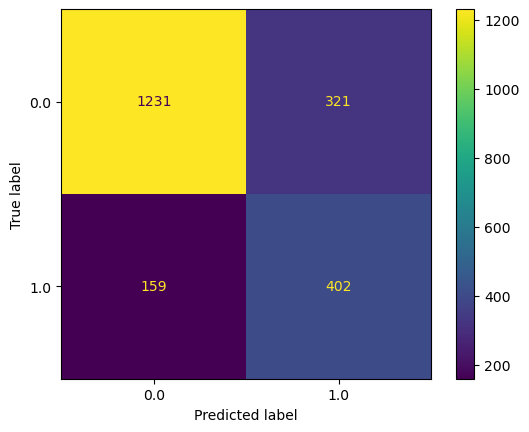

0.0    1552
1.0     561
Name: target, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,stack_model.predict(X_test), labels=stack_model["model"].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels= stack_model["model"].classes_)
disp.plot()
plt.show()
pd.Series(y_test).value_counts()

># Cross validation on best models

[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warn

Text(0.5, 1.0, 'stack')

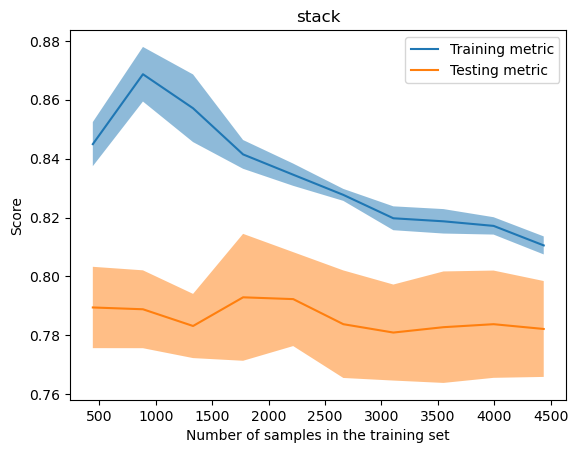

In [ ]:
fig= LearningCurveDisplay.from_estimator(
    stack_model, X_train, y_train, cv=10, n_jobs=-1, score_type= "both", train_sizes= np.linspace(0.1, 1, 10 )
    )   
plt.title("stack")


In [ ]:
df_probs= pd.DataFrame(stack_model.predict_proba(X_test), columns= ["false", "true"] )

df_pred= pd.DataFrame({
    "predict":  stack_model.predict(X_test),
    "actuals": y_test,    
})
df_res=pd.concat(
[df_pred.reset_index(),
df_probs],
axis=1
)
pd.options.plotting.backend = "plotly"
(
        df_res
        .plot.scatter(
                y= "true",     
                x= df_res.index,    
                color= "actuals",                
                height= 800, width= 1600
                )
        .update_traces(marker=dict(size=8))

).show("png")